In [10]:
!pip install scikit-learn
!pip install nltk

In [11]:
#data manipulation
import numpy as np
#excel csv files
import pandas as pd
#graph
import matplotlib.pyplot as plt
 #regular expression(for matching data from scrap)
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#data splitting in training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data =pd.read_csv('/content/drive/MyDrive/asim.csv',encoding='utf-8')

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
data.head(60000)

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
...,...,...
11604,ہنگری سے دور دراز سلوواکیہ کے ساتھ شمالی سرحد...,ورلڈ
11605,یہ وہ جگہ تھی، جہاں 12 تارکین وطن کو لے کر جان...,ورلڈ
11606,اس میں سات تارکین وطن زخمی ہوئے۔ یہ واقع گذشتہ...,ورلڈ
11607,آسٹریا کی سرحد کے اس پار پولیس کے پاس صرف مشرق...,ورلڈ


In [16]:
from tkinter.constants import S
from nltk.corpus import stopwords
stop_words = ['رہا', 'رہی', 'ہیں', 'گی', 'ہو', 'ہوئی', 'گے', 'ہیں', 'ہوں', 'گا', 'تھا', 'ہے', 'ہوا', 'تھی', 'تھے', 'تھا۔', 'ہے؟', 'ہے۔', 'ہیں۔', 'گا۔', 'ہو۔', 'گا۔', 'ہیں۔','گئے','گیا','تھی۔','گئے۔','گیا۔']
data['News'] = data['News'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
data.head(50000)


,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
...,...,...
11604,ہنگری سے دور دراز سلوواکیہ کے ساتھ شمالی سرحد ...,ورلڈ
11605,یہ وہ جگہ تھی، جہاں 12 تارکین وطن کو لے کر جان...,ورلڈ
11606,اس میں سات تارکین وطن زخمی ہوئے۔ یہ واقع گذشتہ...,ورلڈ
11607,آسٹریا کی سرحد کے اس پار پولیس کے پاس صرف مشرق...,ورلڈ


In [17]:
data=data.dropna()

In [18]:
data.head()

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان


In [19]:
import re
pattern = r'[a-zA-Z0-9!?(,)،’‘۔؟]'
data['News']=data['News'].apply (lambda x: re.sub(pattern,'',x))
data.head(20)
#succesful remove of symbols

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
5,عامر حسین اور اقبال طاہر ہی صرف رواں سال جون ا...,پاکستان
6,بجلی کے بلوں میں اضافے کی وجہ ایک تو بجلی کی ز...,پاکستان
7,بجلی کے بلوں میں بجلی کی ان تقسیم کار کمپنیوں ...,پاکستان
8,نیپرا کے مطابق بجلی تقسیم کار کمپنیاں غیر قانو...,پاکستان
9,نیپرا کی جانب سے کی جانے والی انکوائری کی رپور...,پاکستان


In [20]:
categories =data['Headings'].unique()
for category in categories:
        print(category)


پاکستان
کھیل
سائنس
ورلڈ


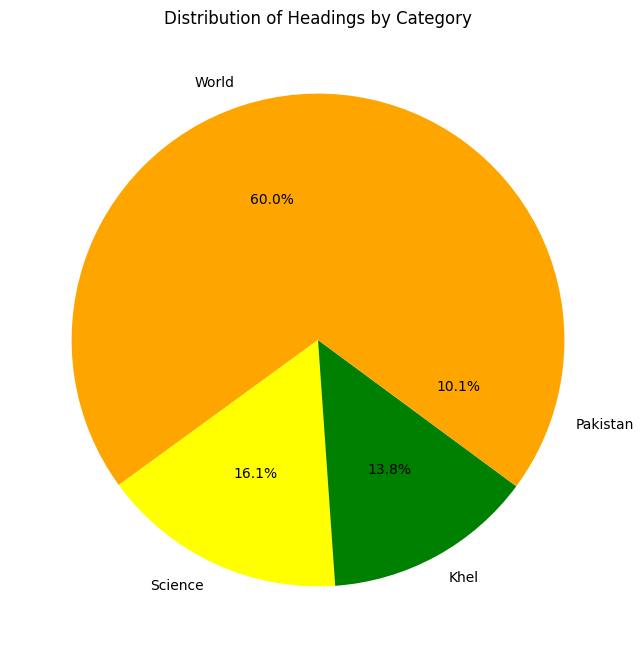

In [39]:
import matplotlib.pyplot as plt
category_mapping= {'پاکستان':'Pakistan','کھیل':'Khel','سائنس':'Science','ورلڈ':'World'}
category_counts= data['Headings'].map(category_mapping).value_counts()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['orange', 'yellow', 'green'])
plt.title('Distribution of Headings by Category')
plt.show()

In [22]:
data.head()

,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [30]:
hashing_vectorizer = HashingVectorizer()
x_hashing=hashing_vectorizer.fit_transform(data['News'])
y=data['Headings']

In [29]:
print(x_hashing)

  (0, 53908)	0.11043152607484653
  (0, 110014)	-0.11043152607484653
  (0, 125710)	-0.11043152607484653
  (0, 202014)	0.11043152607484653
  (0, 206252)	-0.11043152607484653
  (0, 296826)	-0.11043152607484653
  (0, 305242)	0.11043152607484653
  (0, 316451)	-0.11043152607484653
  (0, 349542)	0.11043152607484653
  (0, 370685)	0.11043152607484653
  (0, 393619)	0.11043152607484653
  (0, 409472)	0.22086305214969307
  (0, 454415)	-0.11043152607484653
  (0, 478986)	-0.11043152607484653
  (0, 514984)	-0.11043152607484653
  (0, 578928)	-0.11043152607484653
  (0, 591793)	-0.11043152607484653
  (0, 597325)	-0.11043152607484653
  (0, 670496)	-0.11043152607484653
  (0, 706913)	-0.11043152607484653
  (0, 707069)	0.11043152607484653
  (0, 747697)	0.3312945782245396
  (0, 757634)	0.3312945782245396
  (0, 818104)	0.11043152607484653
  (0, 821788)	0.44172610429938614
  :	:
  (11607, 471127)	0.09534625892455924
  (11607, 528667)	-0.09534625892455924
  (11607, 530805)	0.09534625892455924
  (11607, 585514)	0

In [28]:
X_train, X_test, y_train,y_test=train_test_split(x_hashing,y,test_size=0.4,random_state=42)
classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

In [32]:
y_pred=classifier.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       سائنس       0.81      0.21      0.34       758
        ورلڈ       0.71      0.98      0.82      2762
     پاکستان       0.89      0.21      0.34       483
        کھیل       0.93      0.72      0.81       641

    accuracy                           0.74      4644
   macro avg       0.84      0.53      0.58      4644
weighted avg       0.77      0.74      0.69      4644

